#Tratamento de Dados

In [ ]:
# Importação do Google Drive
from google.colab import drive

# Bibliotecas para análise de dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para manipulação de modelos de árvore de decisão e visualização
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier  # Ou DecisionTreeRegressor, dependendo do seu problema

# Bibliotecas para tratamento de dados desbalanceados
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Bibliotecas auxiliares
from collections import Counter

# Métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_train = '/content/drive/MyDrive/lending/train.csv'
path_test = '/content/drive/MyDrive/lending/test.csv'

In [ ]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001128,NaN,0
1,0.433333,2.025665e-06,0.036896,NaN,0.202035,0.000000,1.487062e-07,0.863415,0.333333,0.435244,...,0.004409,0.016618,3.786029e-07,0.001540,NaN,1.599900e-06,0.000000,NaN,0.000000,1
2,0.600000,1.503073e-02,0.064639,NaN,0.096657,0.000000,1.478698e-07,0.954888,0.633333,0.382166,...,0.000807,0.013685,1.074924e-07,0.000770,NaN,5.333333e-01,0.000702,NaN,0.000000,1
3,0.333333,1.555804e-07,0.056000,NaN,0.055959,0.000000,1.120742e-07,0.512857,0.333333,0.382166,...,0.000000,0.006843,1.839721e-07,0.000257,NaN,9.990000e-08,0.000379,NaN,0.066667,0
4,0.833333,8.325896e-07,0.090909,NaN,0.211483,0.000000,3.115530e-07,0.873213,0.666667,0.433121,...,0.001829,0.024438,8.865658e-08,0.000513,0.000002,4.699000e-07,0.000001,NaN,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152033,0.233333,5.770430e-07,0.114967,0.048920,0.326308,0.001919,1.151014e-08,0.639834,0.533333,0.454352,...,0.000000,0.034213,NaN,0.001540,NaN,3.055000e-07,0.004370,0.001288,0.100000,1
152034,0.233333,5.747985e-07,0.113082,0.048920,0.322674,0.001919,6.740689e-09,0.986754,0.366667,0.443206,...,0.000000,0.034213,NaN,0.001540,NaN,3.055000e-07,0.004277,0.001288,0.000000,1
152035,0.800000,1.597657e-06,0.013962,0.219988,0.263808,0.006501,3.039188e-07,0.769566,0.900000,0.358280,...,0.000001,0.007820,NaN,0.003338,NaN,4.090000e-07,0.000000,0.005556,0.000000,1
152036,0.700000,2.142396e-07,0.083744,0.032713,0.091570,0.003921,1.385943e-07,0.743508,0.266667,0.213854,...,0.000000,0.006843,6.990711e-09,0.004108,NaN,6.887000e-08,0.000235,0.001866,0.000000,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152038 entries, 0 to 152037
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      151333 non-null  float64
 1   x1      152037 non-null  float64
 2   x2      152037 non-null  float64
 3   x3      71762 non-null   float64
 4   x4      152037 non-null  float64
 5   x5      152037 non-null  float64
 6   x6      146648 non-null  float64
 7   x7      152037 non-null  float64
 8   x8      149891 non-null  float64
 9   x9      147583 non-null  float64
 10  x10     151937 non-null  float64
 11  x11     71762 non-null   float64
 12  x12     151333 non-null  float64
 13  x13     151937 non-null  float64
 14  x14     152037 non-null  float64
 15  x15     149943 non-null  float64
 16  x16     71762 non-null   float64
 17  x17     152037 non-null  float64
 18  x18     146412 non-null  float64
 19  x19     151333 non-null  float64
 20  x20     151876 non-null  float64
 21  x21     15

In [ ]:
pd.set_option('display.max_columns', None)
print(df_train.describe())

                  x0            x1             x2            x3  \
count  151333.000000  1.520370e+05  152037.000000  71762.000000   
mean        0.654601  1.051418e-03       0.194713      0.066569   
std         0.252200  8.748951e-03       0.193395      0.076830   
min         0.000000  0.000000e+00       0.000000      0.000000   
25%         0.500000  2.417643e-07       0.041667      0.020308   
50%         0.700000  5.023550e-07       0.122449      0.042917   
75%         0.833333  1.095194e-06       0.295635      0.082333   
max         1.000000  1.000000e+00       1.000000      1.000000   

                  x4             x5            x6             x7  \
count  152037.000000  152037.000000  1.466480e+05  152037.000000   
mean        0.163635       0.007806  2.730345e-04       0.724343   
std         0.121331       0.016800  9.433906e-03       0.219183   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%         0.071948       0.000000  4.685601e-08       

In [ ]:
# Número mínimo de valores não nulos que uma linha deve ter (20% não nulos = 80% NaN)
threshold = int(0.6 * len(df_train.columns))  # 20% de colunas não podem ser NaN

# Remover as linhas que têm mais de 80% de NaN
df_cleaned = df_train.dropna(thresh=threshold)

# Mostrar o DataFrame resultante
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151842 entries, 1 to 152037
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      151333 non-null  float64
 1   x1      151842 non-null  float64
 2   x2      151842 non-null  float64
 3   x3      71719 non-null   float64
 4   x4      151842 non-null  float64
 5   x5      151842 non-null  float64
 6   x6      146648 non-null  float64
 7   x7      151842 non-null  float64
 8   x8      149740 non-null  float64
 9   x9      147422 non-null  float64
 10  x10     151842 non-null  float64
 11  x11     71719 non-null   float64
 12  x12     151333 non-null  float64
 13  x13     151842 non-null  float64
 14  x14     151842 non-null  float64
 15  x15     149879 non-null  float64
 16  x16     71719 non-null   float64
 17  x17     151842 non-null  float64
 18  x18     146292 non-null  float64
 19  x19     151333 non-null  float64
 20  x20     151816 non-null  float64
 21  x21     151842 

In [ ]:
# df_filled = df_train.fillna(df_train.median())
df_filled_median = df_cleaned.copy()

# Limite de valores NaN permitidos (40% de NaN = 60% de valores não nulos)
nan_threshold = 0.2

# Iterar sobre as colunas
for column in df_filled_median.columns:
    # Calcular a porcentagem de NaN na coluna
    nan_percentage = df_filled_median[column].isna().mean()

    # Se a coluna tem 40% ou menos de NaN, substituímos pela mediana
    if nan_percentage <= nan_threshold:
        # Calcular a mediana da coluna, ignorando os NaN
        median_value = df_filled_median[column].median()
        # Substituir NaN pela mediana
        df_filled_median[column].fillna(median_value, inplace=True)

# Exibir o DataFrame resultante
df_filled_median

<ipython-input-8-85b665085001>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_median[column].fillna(median_value, inplace=True)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
1,0.433333,2.025665e-06,0.036896,NaN,0.202035,0.000000,1.487062e-07,0.863415,0.333333,0.435244,0.006466,NaN,0.041198,0.018891,0.000652,0.087470,NaN,0.065108,0.109073,0.433333,4.577322e-07,0.900587,0.000000,0.535211,0.011363,0.011356,1.081000e-07,0.281690,0.022451,3.468532e-06,0.013128,0.159992,NaN,0.007222,0.092705,4.335154e-07,0.359848,0.013083,0.001564,NaN,0.004106,0.035440,0.002112,0.022365,8.255450e-07,NaN,0.009000,0.500000,1.256651e-06,0.000000,0.250000,NaN,0.004409,0.016618,3.786029e-07,0.001540,NaN,1.599900e-06,0.000000,NaN,0.000000,1
2,0.600000,1.503073e-02,0.064639,NaN,0.096657,0.000000,1.478698e-07,0.954888,0.633333,0.382166,0.130769,NaN,0.035181,0.001299,0.007083,0.046034,NaN,0.003686,0.002722,0.533333,2.430092e-02,0.955168,0.000000,0.866889,0.000543,0.046924,4.131000e-07,0.119800,0.001072,6.233016e-08,0.039583,0.005809,NaN,0.006240,0.000000,6.609240e-08,0.000000,0.019765,0.004882,NaN,0.000255,0.001411,0.015206,0.133405,6.426537e-07,NaN,0.000000,0.109375,1.526074e-03,0.000000,0.008929,NaN,0.000807,0.013685,1.074924e-07,0.000770,NaN,5.333333e-01,0.000702,NaN,0.000000,1
3,0.333333,1.555804e-07,0.056000,NaN,0.055959,0.000000,1.120742e-07,0.512857,0.333333,0.382166,0.003960,NaN,0.007930,0.005359,0.000889,0.024500,NaN,0.195780,0.113267,0.333333,6.926119e-08,0.667101,0.000000,0.655172,0.002567,0.005572,8.440000e-08,0.224138,0.005071,7.813809e-07,0.001085,0.009990,NaN,0.009873,0.001520,0.000000e+00,0.032468,0.004109,0.000126,NaN,0.000723,0.005215,0.001373,0.067095,1.626300e-07,NaN,0.000000,0.142857,3.860662e-07,0.000000,0.058824,NaN,0.000000,0.006843,1.839721e-07,0.000257,NaN,9.990000e-08,0.000379,NaN,0.066667,0
4,0.833333,8.325896e-07,0.090909,NaN,0.211483,0.000000,3.115530e-07,0.873213,0.666667,0.433121,0.080417,NaN,0.038021,0.000758,0.006194,0.028016,NaN,0.079558,0.022815,0.766667,4.542247e-07,0.940980,0.000000,0.492851,0.003835,0.016040,4.182000e-07,0.495374,0.004060,1.350992e-06,0.026449,0.021990,NaN,0.005419,0.013678,1.739930e-07,0.001711,0.017074,0.004216,NaN,0.000378,0.001591,0.062196,0.078278,6.910218e-07,NaN,0.000000,0.433628,1.069284e-07,0.000000,0.004695,NaN,0.001829,0.024438,8.865658e-08,0.000513,0.000002,4.699000e-07,0.000001,NaN,0.000000,1
5,0.700000,1.441754e-06,0.006042,NaN,0.125727,0.000000,1.006993e-07,0.992551,0.066667,0.219745,0.002263,NaN,0.013135,0.051099,0.000919,0.042553,NaN,0.035183,0.102860,0.466667,2.439015e-08,0.000000,0.000000,1.000000,0.012784,0.000852,9.390000e-08,0.000000,0.025257,8.865259e-07,0.038521,0.179992,NaN,NaN,0.074468,5.520187e-08,0.021591,0.008616,0.005096,NaN,0.004065,0.041951,0.000000,0.111825,2.939125e-07,NaN,0.000000,0.258065,1.144528e-06,0.000000,0.157895,NaN,0.000206,0.003910,NaN,0.002567,NaN,1.799900e-06,0.000000,NaN,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152033,0.233333,5.770430e-07,0.114967,0.048920,0.326308,0.001919,1.151014e-08,0.639834,0.533333,0.454352,0.015922,0.003724,0.001043,0.003681,0.007735,0.119923,0.005566,0.078852,0.144708,0.200000,1.209784e-07,0.111184,0.000089,0.504950,0.003906,0.004503,1.000000e-10,0.138614,0.004287,1.003530e-06,0.029561,0.030550,0.857970,NaN,0.012158,0.000000e+00,0.038961,0.001931,0.003758,NaN,0.000340,0.002080,0.002957,0.018638,2.560093e-08,0.001957,0.001346,0.000000,1.200251e-07,0.002774,0.500000,0.094821,0.000000,0.034213,NaN,0.001540,NaN,3.055000e-07,0.004370,0.001288,0.100000,1
152034,0.233333,5.747985e-07,0.113082,0.048920,0.322674,0.001919,6.740689e-09,0.986754,0.366667,0.443206,0.016326,0.003724,0.006462,0.003735,0.007735,0.123146,0.005566,0.079073,0.126526,0.233333,1.240931e-0

In [ ]:
df_filled_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151842 entries, 1 to 152037
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      151842 non-null  float64
 1   x1      151842 non-null  float64
 2   x2      151842 non-null  float64
 3   x3      71719 non-null   float64
 4   x4      151842 non-null  float64
 5   x5      151842 non-null  float64
 6   x6      151842 non-null  float64
 7   x7      151842 non-null  float64
 8   x8      151842 non-null  float64
 9   x9      151842 non-null  float64
 10  x10     151842 non-null  float64
 11  x11     71719 non-null   float64
 12  x12     151842 non-null  float64
 13  x13     151842 non-null  float64
 14  x14     151842 non-null  float64
 15  x15     151842 non-null  float64
 16  x16     71719 non-null   float64
 17  x17     151842 non-null  float64
 18  x18     151842 non-null  float64
 19  x19     151842 non-null  float64
 20  x20     151842 non-null  float64
 21  x21     151842 

#Treinando o Modelo

Acurácia no Test Data: 0.8209566350269868
Relatório de Classificação no Test Data:
               precision    recall  f1-score   support

           0       0.65      0.42      0.51      2388
           1       0.85      0.93      0.89      8358

    accuracy                           0.82     10746
   macro avg       0.75      0.68      0.70     10746
weighted avg       0.81      0.82      0.81     10746

AUC-ROC Score: 0.7711681463070316


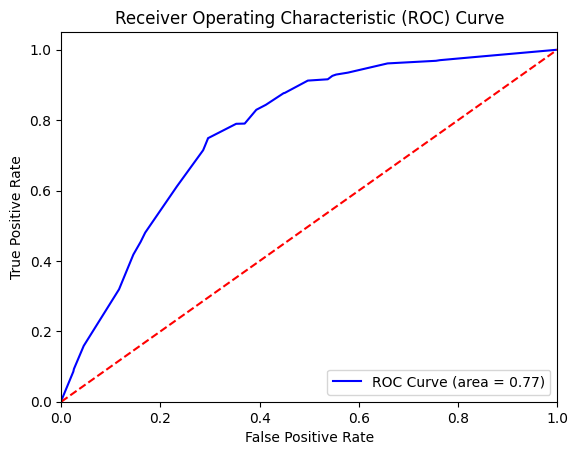

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assumindo que df_train e df_test já estão carregados
# df_train = pd.read_csv('path_to_train_data.csv')
# df_test = pd.read_csv('path_to_test_data.csv')

# Definir as features e a variável target
X_train = df_train.drop(columns=['y'])  # Substitua 'Y' pelo nome correto da sua coluna alvo
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])  # Features no conjunto de teste
y_test = df_test['y']  # Alvo no conjunto de teste

# Treinando o modelo de Árvore de Decisão com hiperparâmetros ajustáveis
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    max_leaf_nodes=30,           # Corrigido para max_leaf_nodes
    min_samples_split=5,         # Mínimo de amostras para dividir um nó
    min_samples_leaf=1,          # Mínimo de amostras por folha
    random_state=42,
)

# Treinando o modelo com os dados de treinamento
dt_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_test = dt_classifier.predict(X_test)
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Probabilidade para a classe positiva

# Avaliando o desempenho no conjunto de teste
print("Acurácia no Test Data:", accuracy_score(y_test, y_pred_test))
print("Relatório de Classificação no Test Data:\n", classification_report(y_test, y_pred_test))

# Calcular a ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Gerar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Ajuste Threshold

In [ ]:
# Ajustar o threshold
threshold = 0.77  # Você pode ajustar isso conforme necessário
y_pred_threshold = np.where(y_pred_prob > threshold, 1, 0)

# Avaliar o desempenho com o novo threshold
print("Acurácia no Test Data com threshold:", accuracy_score(y_test, y_pred_threshold))
print("Relatório de Classificação com novo threshold:\n", classification_report(y_test, y_pred_threshold))

Acurácia no Test Data com threshold: 0.7386934673366834
Relatório de Classificação com novo threshold:
               precision    recall  f1-score   support

           0       0.44      0.70      0.55      2388
           1       0.90      0.75      0.82      8358

    accuracy                           0.74     10746
   macro avg       0.67      0.73      0.68     10746
weighted avg       0.80      0.74      0.76     10746



In [ ]:
# Valores definidos para cálculo de lucro
lucro_por_pagamento = 200  # 20% de lucro para cada pagamento bem-sucedido
prejuizo_por_inadimplente = 1000  # Prejuízo de R$1000 para cada inadimplência

# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred_threshold)
print("Matriz de Confusão:\n", matriz_confusao)

# Obter TP, FN, TN, FP
TP = matriz_confusao[1, 1]  # Pagadores previstos corretamente
FN = matriz_confusao[1, 0]  # Pagadores previstos incorretamente
TN = matriz_confusao[0, 0]  # Inadimplentes previstos corretamente
FP = matriz_confusao[0, 1]  # Inadimplentes previstos incorretamente (erros custosos)

# Calcular o lucro esperado
lucro_esperado = (TP * lucro_por_pagamento) - (FP * prejuizo_por_inadimplente)
print("Lucro Esperado:", lucro_esperado)

Matriz de Confusão:
 [[1682  706]
 [2102 6256]]
Lucro Esperado: 545200


#Verificando Overfiting e Underfiting

In [ ]:
# Avaliando o desempenho no conjunto de treinamento e validação
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Acurácia no conjunto de treino:", train_accuracy)
print("Acurácia no conjunto de validação:", val_accuracy)

# Análise de Overfitting e Underfitting
if train_accuracy < 0.5:
    print("Underfitting: O modelo não está aprendendo bem os dados de treino.")
elif train_accuracy >= 0.5 and train_accuracy >= val_accuracy:
    print("Overfitting: O modelo aprende bem os dados de treino, mas não generaliza bem para o conjunto de validação.")
else:
    print("O modelo parece estar bem ajustado: bom desempenho em ambos os conjuntos.")


Acurácia no conjunto de treino: 0.8652113287467607
Acurácia no conjunto de validação: 0.867830833991055
O modelo parece estar bem ajustado: bom desempenho em ambos os conjuntos.


#Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# Definindo o modelo de Árvore de Decisão
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    max_leaf_nodes=30,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42,
)

# Realizando a validação cruzada
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Exibindo os resultados da validação cruzada
print("Acurácias da validação cruzada:", cv_scores)
print("Acurácia média:", cv_scores.mean())
print("Desvio padrão da acurácia:", cv_scores.std())


Acurácias da validação cruzada: [0.85694554 0.86444357 0.85934622 0.866511   0.86295919]
Acurácia média: 0.8620411041185726
Desvio padrão da acurácia: 0.003458954312771547


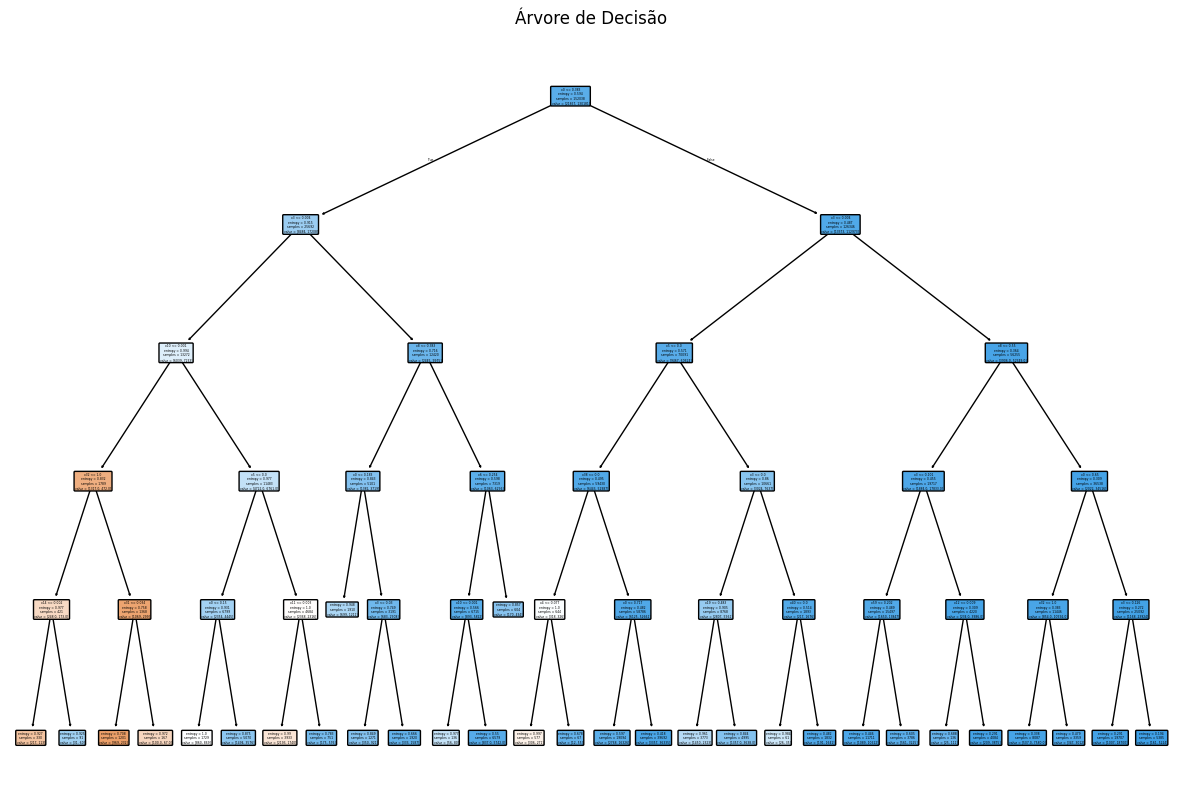

Características mais importantes:
1. x0: 0.4743
2. x3: 0.2328
3. x5: 0.1317
4. x10: 0.0426
5. x38: 0.0350
6. x8: 0.0349
7. x11: 0.0160
8. x19: 0.0072
9. x32: 0.0064
10. x59: 0.0050
11. x6: 0.0048
12. x40: 0.0023
13. x31: 0.0019
14. x4: 0.0018
15. x14: 0.0017
16. x12: 0.0017
17. x25: 0.0000
18. x24: 0.0000
19. x23: 0.0000
20. x22: 0.0000
21. x21: 0.0000
22. x20: 0.0000
23. x15: 0.0000
24. x18: 0.0000
25. x17: 0.0000
26. x16: 0.0000
27. x27: 0.0000
28. x13: 0.0000
29. x9: 0.0000
30. x7: 0.0000
31. x2: 0.0000
32. x1: 0.0000
33. x26: 0.0000
34. x60: 0.0000
35. x28: 0.0000
36. x47: 0.0000
37. x58: 0.0000
38. x57: 0.0000
39. x56: 0.0000
40. x55: 0.0000
41. x54: 0.0000
42. x53: 0.0000
43. x52: 0.0000
44. x51: 0.0000
45. x50: 0.0000
46. x49: 0.0000
47. x48: 0.0000
48. x46: 0.0000
49. x29: 0.0000
50. x45: 0.0000
51. x44: 0.0000
52. x43: 0.0000
53. x42: 0.0000
54. x41: 0.0000
55. x39: 0.0000
56. x37: 0.0000
57. x36: 0.0000
58. x35: 0.0000
59. x34: 0.0000
60. x33: 0.0000
61. x30: 0.0000


In [ ]:
from sklearn.tree import plot_tree

# Treinando o modelo de Árvore de Decisão
dt_classifier.fit(X_train, y_train)

# Plotar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Árvore de Decisão")
plt.show()

# Exibir as importâncias das features
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Exibir as características mais importantes
print("Características mais importantes:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {X_train.columns[indices[f]]}: {importances[indices[f]]:.4f}")


In [104]:
dot_data = export_graphviz(dt_classifier, out_file=None,
                           filled=True, rounded=True,
                           feature_names=X.columns,
                           class_names=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
graph.view()

'decision_tree.pdf'